# Car Price Prediction

## Import the libraries

In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

## Reading the dataset

In [2]:
dataset=pd.read_csv('CarData.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(205, 26)


In [3]:
## print the top5 records
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- Dataset is clean and no substitution of Null values is required

In [6]:
## Removing the car_ID feature
dataset=dataset.drop('car_ID',axis=1)

## Preprocessing of Data

In [7]:
## CarName Variable has two parts:1.Company name && 2.Model name
##CarName-->CompanyName
#Each element of the CarName column will be split into two Strings, and we will only keep the first one
CompanyName = dataset['CarName'].apply(lambda x : x.split(' ')[0])

#Insert the new variable as a column in our dataset
dataset.insert(3,"CompanyName",CompanyName)

#Remove CarModel column
dataset.drop(['CarName'],axis=1,inplace=True)


In [8]:
#unique values (companyname)
dataset.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
len(dataset.CompanyName.unique())

28

In [10]:
#Correction (spelling error)
dataset.CompanyName = dataset.CompanyName.str.lower()

def new_name(a,b):
    dataset.CompanyName.replace(a,b,inplace=True)

new_name('maxda','mazda')
new_name('porcshce','porsche')
new_name('toyouta','toyota')
new_name('vokswagen','volkswagen')
new_name('vw','volkswagen')

print(dataset.CompanyName.unique())
print(len(dataset.CompanyName.unique()))

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
22


**2. Examine categorical variables and correct them if spelling errors are found**

In [11]:
def get_variable_type(element) :
    """
     Check that the columns are of continuous or categorical variable.
     The assumption is that if:
                  unique number < 20 then we assume it is categorical
                  unique number >= 20 and dtype = [int64 or float64] then we assume it's continuous
     """
    if element==0:
        return "Not Known"
    elif element < 20 and element!=0 :
        return "Categorical"
    elif element >= 20 and element!=0 :
        return "Contineous"
    
def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Unique_Values_Count"].apply(get_variable_type).astype(str)
    metadata_matrix["frequency"] = metadata_matrix["Null_Count"] - metadata_matrix["Null_Count"]
    metadata_matrix["frequency"].astype(int)
    return metadata_matrix 

def get_meta_data(dataframe) :
    """
     Method to get metadata about any passed dataset
    """
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes.astype(str), # column data types
                    'Non_Null_Count': dataframe.count(axis = 0).astype(int), # total number of items in columns
                    'Null_Count': dataframe.isnull().sum().astype(int), # total null values ​​in columns
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100, # percentage of null values
                    'Unique_Values_Count': dataframe.nunique().astype(int) # nombre de valeurs uniques
                     })
    
    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix

def list_potential_categorical_type(dataframe,data) :
    print("*********potential categorical data type columns*********")
    metadata_matrix_categorical = dataframe[dataframe["Variable_Type"] == "Categorical"]
    
    length = len(metadata_matrix_categorical)
    if length == 0 :
        print("No categorical columns in a given dataset.")  
    else :    
        metadata_matrix_categorical = metadata_matrix_categorical.filter(["Datatype","Unique_Values_Count"])
        metadata_matrix_categorical.sort_values(["Unique_Values_Count"], axis=0,ascending=False, inplace=True)
        col_to_check = metadata_matrix_categorical.index.tolist()
        name_list = []
        values_list = []
        
        for name in col_to_check :
            name_list.append(name)
            values_list.append(data[name].unique())
        
        temp = pd.DataFrame({"index":name_list,"Unique_Values":values_list})
        metadata_matrix_categorical = metadata_matrix_categorical.reset_index()
        metadata_matrix_categorical = pd.merge(metadata_matrix_categorical,temp,how='inner',on='index')
        display(metadata_matrix_categorical.set_index("index"))

In [12]:
metadata = get_meta_data(dataset)

#List potential columns of categorical variables
list_potential_categorical_type(metadata,dataset)

*********potential categorical data type columns*********


,Datatype,Unique_Values_Count,Unique_Values
index,,,
fuelsystem,object,8,"[mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]"
enginetype,object,7,"[dohc, ohcv, ohc, l, rotor, ohcf, dohcv]"
cylindernumber,object,7,"[four, six, five, three, twelve, two, eight]"
symboling,int64,6,"[3, 1, 2, 0, -1, -2]"
carbody,object,5,"[convertible, hatchback, sedan, wagon, hardtop]"
drivewheel,object,3,"[rwd, fwd, 4wd]"
fueltype,object,2,"[gas, diesel]"
aspiration,object,2,"[std, turbo]"
doornumber,object,2,"[two, four]"


But there is another variable that is not considered categorical. It's the column "CompanyName".

## Exploratory data analysis

## Numerical Faeatures

In [13]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  15


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# Dependent variable visualization: Price

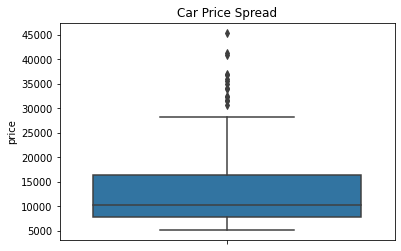

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [14]:
plt.title('Car Price Spread')
sns.boxplot(y=dataset.price)
plt.show()
print(dataset.price.describe())

the price field has an average around 13K and a median around 10k with the most expensive car values at 45k and the cheapest cars at 5k.

- Since we have mean > median, then our distribution is positively asymmetric, as we can see in the following histogram:

<ipython-input-15-f444d12e1800>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.price)


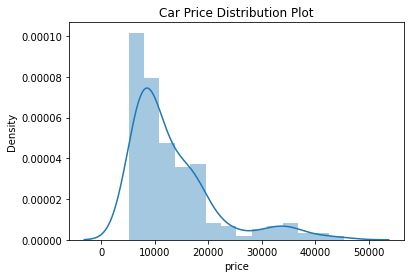

In [15]:
plt.title('Car Price Distribution Plot')
sns.distplot(dataset.price)
plt.show()

**Conclusion**

Which means that most of the prices offered by this company are low.

As seen below, we have **75%** prices are around **16k**, or **25%** between **17k and 45k**.

# Visualization of independent variables:

**linear relationship between the dependent variable "Price" and the numerical independent variables**
- Draw XY scatter plot, and check are they linear or not?

In [16]:
import scipy
from scipy.stats.stats import pearsonr

def pairplot(x_axis,y_axis) :
    sns.pairplot(dataset,x_vars=x_axis,y_vars=y_axis,height=4,aspect=1,kind="scatter")
    plt.show()

<ipython-input-16-d0baf91f2591>:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [17]:
#Determine the independent variable
y_vars=['price']

**Price VS Wheelbase - curbweight - boreratio**

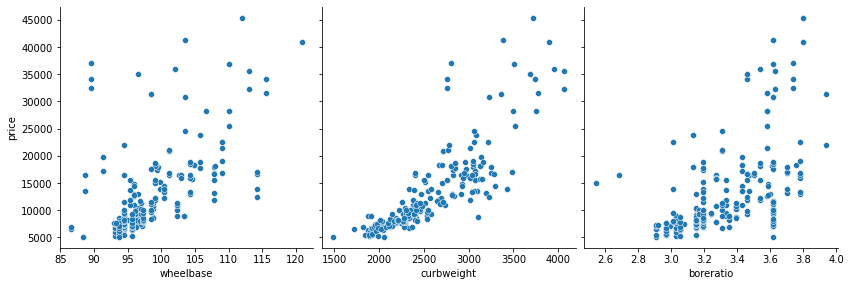

At first glance, the 3 variables are positively correlated but spread at higher values.

We can make sure of this by looking at the Coefficient of Correlation

Coefficient of Correlation between Price and wheelbase: 57.78155982921503 %
Correlation coefficient between Price and curbweight: 83.53048793372967 %
Correlation coefficient between Price and boreratio:  55.317323679844364 %


In [18]:
x_vars=['wheelbase','curbweight','boreratio']
pairplot(x_vars,y_vars)
print("At first glance, the 3 variables are positively correlated but spread at higher values.")

p1=dataset['wheelbase']
p2=dataset['curbweight']
p3=dataset['boreratio']

pearson_coeff, p_value = pearsonr(p1,dataset['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCoefficient of Correlation between Price and wheelbase:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,dataset['price'])
print('Correlation coefficient between Price and curbweight:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,dataset['price'])
print('Correlation coefficient between Price and boreratio: ',pearson_coeff*100,'%')

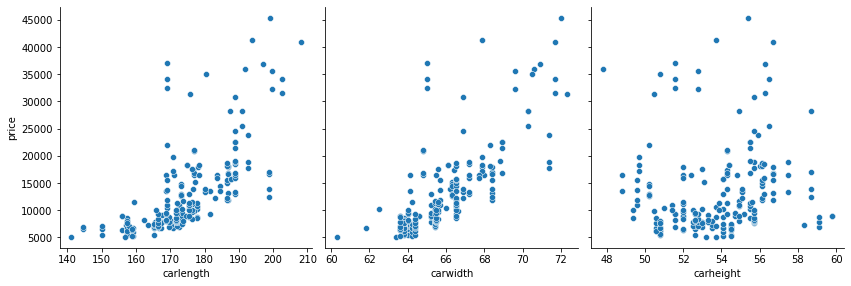

Carlength and Carwidth are more correlated than carheight which is more spread out but positive.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and carlength: 68.2920015677962 %
Correlation coefficient between Price and carwidth:  75.93252997415115 %
Correlation coefficient between Price and carheight:  11.933622657049447 %


In [19]:
# **Price VS carlength - carwidth - carheight**
x_vars=['carlength','carwidth', 'carheight']
pairplot(x_vars,y_vars)
print("Carlength and Carwidth are more correlated than carheight which is more spread out but positive.")

p1=dataset['carlength']
p2=dataset['carwidth']
p3=dataset['carheight']

pearson_coeff, p_value = pearsonr(p1,dataset['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and carlength:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,dataset['price'])
print('Correlation coefficient between Price and carwidth: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,dataset['price'])
print('Correlation coefficient between Price and carheight: ',pearson_coeff*100,'%')

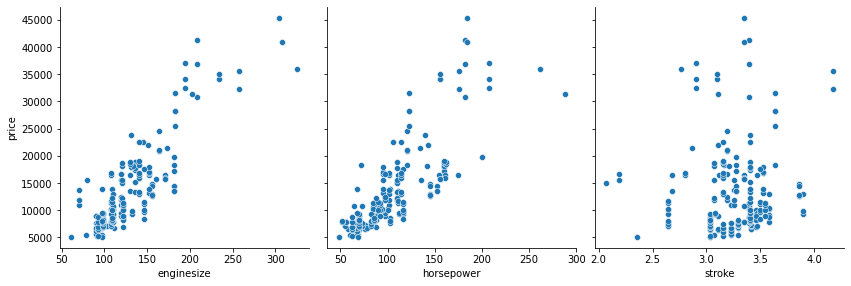

Enginesize and Horsepower are positively correlated, but Stroke is more spread out (may not be related).

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and enginesize:  87.41448025245117 %
Correlation coefficient between Price and horsepower:  80.81388225362217 %
Correlation coefficient between Price and stroke:  7.944308388193101 %


In [20]:
x_vars=['enginesize','horsepower','stroke']
pairplot(x_vars,y_vars)
print("Enginesize and Horsepower are positively correlated, but Stroke is more spread out (may not be related).")

p1=dataset['enginesize']
p2=dataset['horsepower']
p3=dataset['stroke']

pearson_coeff, p_value = pearsonr(p1,dataset['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and enginesize: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,dataset['price'])
print('Correlation coefficient between Price and horsepower: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,dataset['price'])
print('Correlation coefficient between Price and stroke: ',pearson_coeff*100,'%')

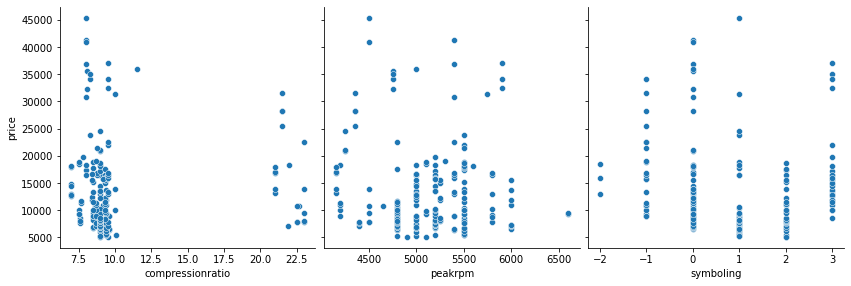

Compressionratio, Peakrpm and symboling are not correlated.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and compressionratio:  6.798350579944263 %
Correlation coefficient between Price and peakrpm:  -8.526715027785688 %
Correlation coefficient between Price and symboling:  -7.997822464270349 %


In [21]:
x_vars=['compressionratio','peakrpm',"symboling"]
pairplot(x_vars,y_vars)
print("Compressionratio, Peakrpm and symboling are not correlated.")

p1=dataset['compressionratio']
p2=dataset['peakrpm']
p3=dataset['symboling']

pearson_coeff, p_value = pearsonr(p1,dataset['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and compressionratio: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,dataset['price'])
print('Correlation coefficient between Price and peakrpm: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,dataset['price'])
print('Correlation coefficient between Price and symboling: ',pearson_coeff*100,'%')

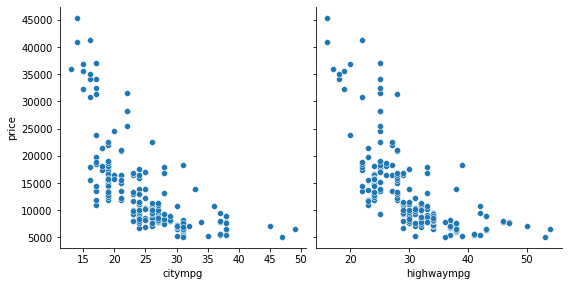

Citympg & Highwaympg are negatively correlated.
The more prices get lower, the higher the distances get, which means that the cheapest cars have better mileage than expensive cars.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and citympg:  -68.575133602704 %
Correlation coefficient between Price and highwaympg:  -69.75990916465562 %


In [22]:
x_vars=['citympg', 'highwaympg']
pairplot(x_vars,y_vars)
print('Citympg & Highwaympg are negatively correlated.\nThe more prices get lower, the higher the distances get, which means that the cheapest cars have better mileage than expensive cars.')

p1=dataset['citympg']
p2=dataset['highwaympg']

pearson_coeff, p_value = pearsonr(p1,dataset['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and citympg: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,dataset['price'])
print('Correlation coefficient between Price and highwaympg: ',pearson_coeff*100,'%')

Conclusion

(+) positively correlated variables with Price: ** wheelbase, carlenght, carwidth, curbweight, enginesize, boreratio, horesepower **

(-) negatively correlated variables with Price: ** citympg, highwaympg **

These variables should be kept for a better model, and the other variables should be ignored as they are not correlated with Price

## Visualizing the Corelation

## multicollinearity between the independent variables

In [23]:
def heatmap(dataframe):
    plt.figure(figsize=(16,5))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

<ipython-input-23-5721e8a081fd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)


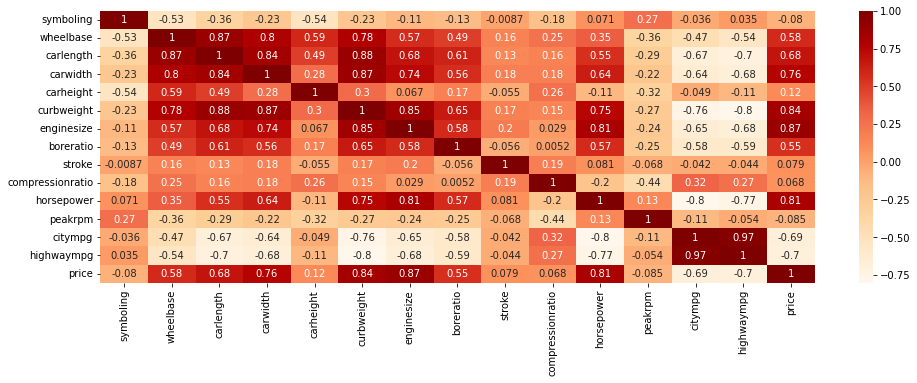

In [24]:
heatmap(dataset)

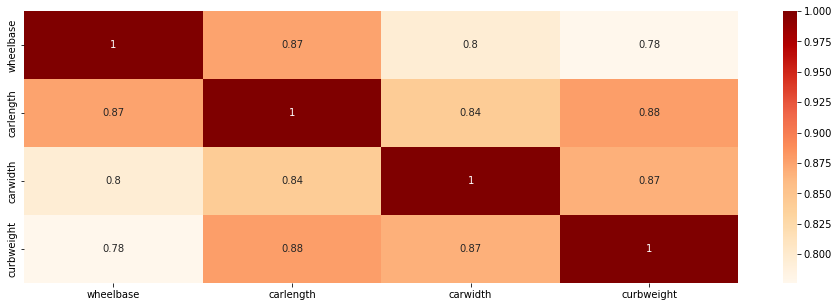

In [25]:
heatmap(dataset.filter(['wheelbase', 'carlength', 'carwidth','curbweight']))

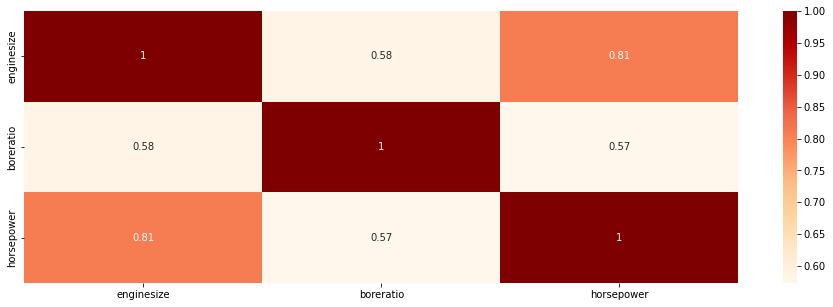

In [26]:
heatmap(dataset.filter(['enginesize','boreratio','horsepower']))

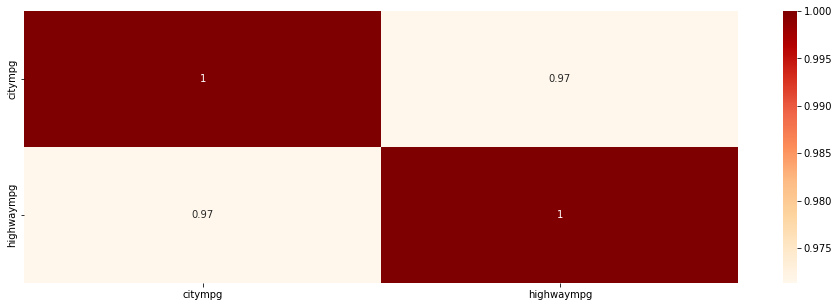

In [27]:
heatmap(dataset.filter( ['citympg','highwaympg']))

Conclusions:
- Wheelbase , carlength, carwidth et curbweight are very correlated and we have to keep only one between them.
- Horsepower and enginesize are highly correlated and we need to keep only one.
- citympg and highwaympg are highly correlated and we need to keep one of them.

### Categorical Variables

In [28]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['fueltype',
 'CompanyName',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [29]:
dataset[categorical_features].head()

,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,audi,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,audi,std,four,sedan,4wd,front,ohc,five,mpfi


In [30]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is fueltype and number of categories are 2
The feature is CompanyName and number of categories are 22
The feature is aspiration and number of categories are 2
The feature is doornumber and number of categories are 2
The feature is carbody and number of categories are 5
The feature is drivewheel and number of categories are 3
The feature is enginelocation and number of categories are 2
The feature is enginetype and number of categories are 7
The feature is cylindernumber and number of categories are 7
The feature is fuelsystem and number of categories are 8


## Analysis of categorical feature

- Price VS CompanyName

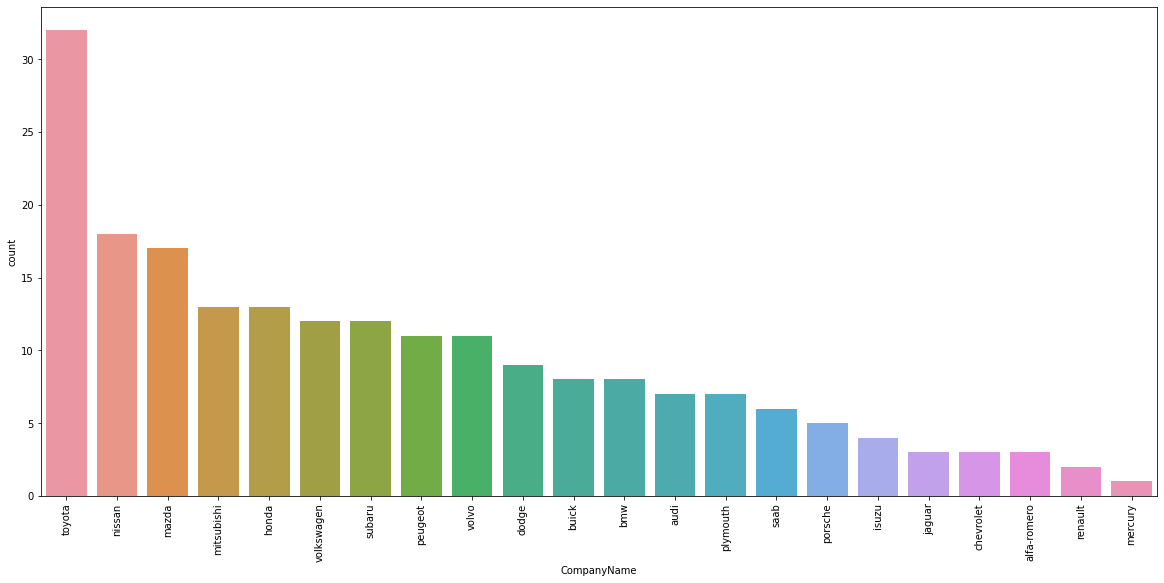

In [31]:
plt.figure(figsize=(20,9))

plt.xticks(rotation = 90)
order = dataset['CompanyName'].value_counts(ascending=False).index
sns.countplot(x='CompanyName', data=dataset, order=order)

plt.show()

#### Conclusions:--
- **Toyota** seems to be very popular, followed by **Nissan** and **Mazda**.

- **Price VS fueltype**

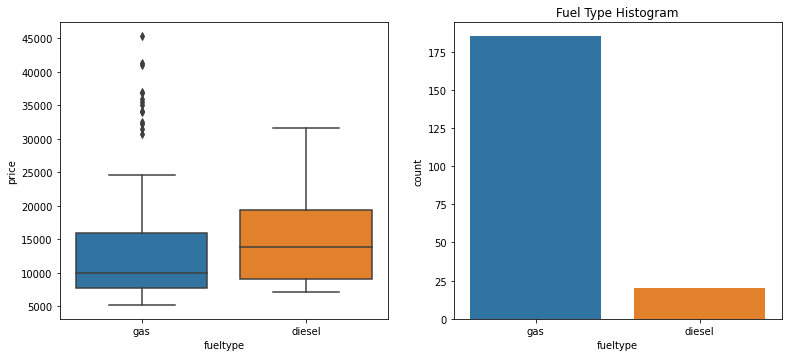

In [32]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = dataset)

plt.subplot(2,3,2)
plt.title('Fuel Type Histogram')
order = dataset['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=dataset, order=order)

plt.show()

The average price of a diesel car is higher than that of gas cars, which explains, according to the histogram, why the company sold more gas cars than diesel cars.

--- Note: Existence of Outliers for Gas

**Price VS aspiration**

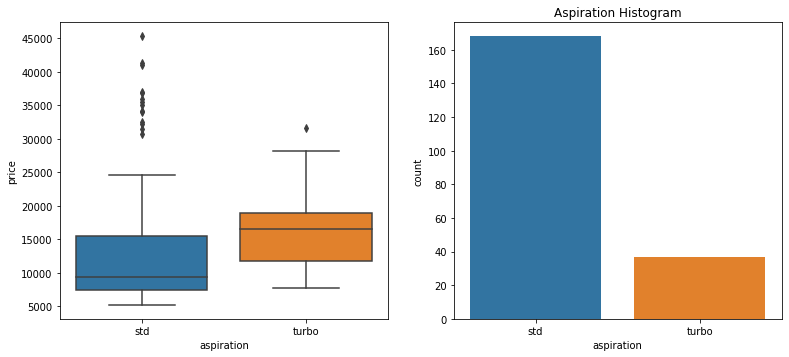

In [33]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'aspiration', y = 'price', data = dataset)

plt.subplot(2,3,2)
plt.title('Aspiration Histogram')
order = dataset['aspiration'].value_counts(ascending=False).index
sns.countplot(x='aspiration', data=dataset, order=order)

plt.show()

The average price of cars with **turbo** aspiration is higher than that of **standard** aspiration, which explains, according to the histogram, why the company sells cars with **standard** aspiration more than of cars with **turbo** aspiration.

- ** Note: Existence of Outliers for ** Turbo ** and ** std **

**Price VS doornumber**

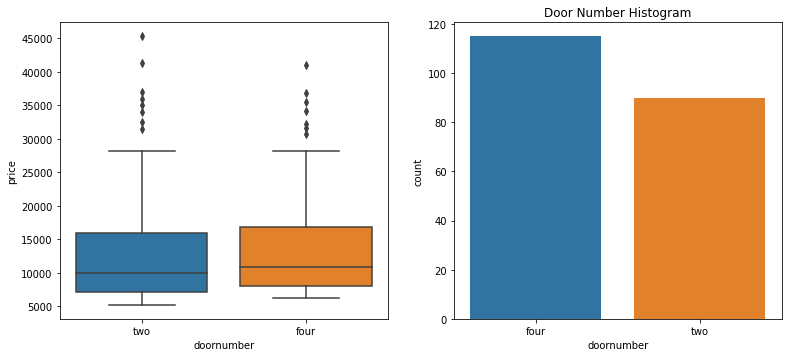

In [34]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = dataset)

plt.subplot(2,3,2)
plt.title('Door Number Histogram')
order = dataset['doornumber'].value_counts(ascending=False).index
sns.countplot(x='doornumber', data=dataset, order=order)

plt.show()

**doornumber** values are pretty close, which means the price is not affected by **doornumber**

Note: Existence of Outliers in **four** and **two**

**Price VS enginelocation**

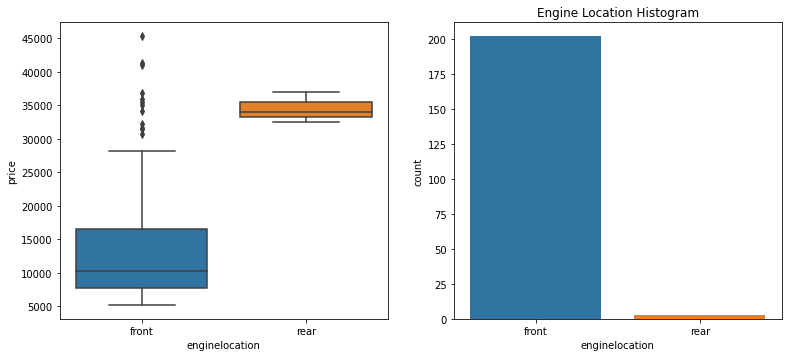

In [35]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = dataset)

plt.subplot(2,3,2)
plt.title('Engine Location Histogram')
order = dataset['enginelocation'].value_counts(ascending=False).index
sns.countplot(x='enginelocation', data=dataset, order=order)

plt.show()

**rear cars** are very expensive, which is why the company sold more cars with **front** rear.

**Price VS carbody**

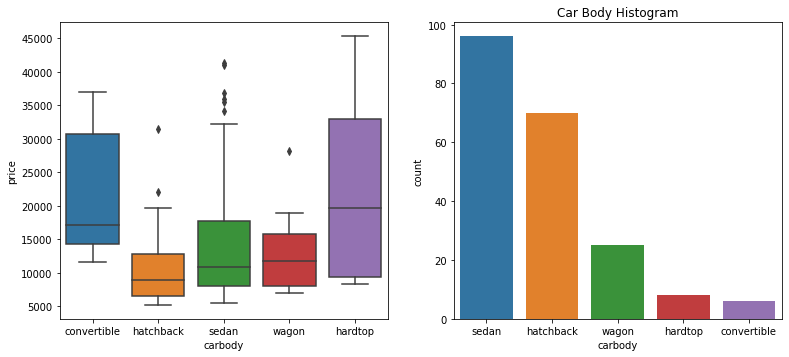

In [36]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='carbody',y='price',data = dataset)

plt.subplot(2,3,2)
plt.title('Car Body Histogram')
order = dataset['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=dataset, order=order)

plt.show()

It seems that ** sedan ** is the most favored.

** hardtop ** has the highest average price.

- Note: Existence of Outliers for several values.

**Price VS fuelsystem**

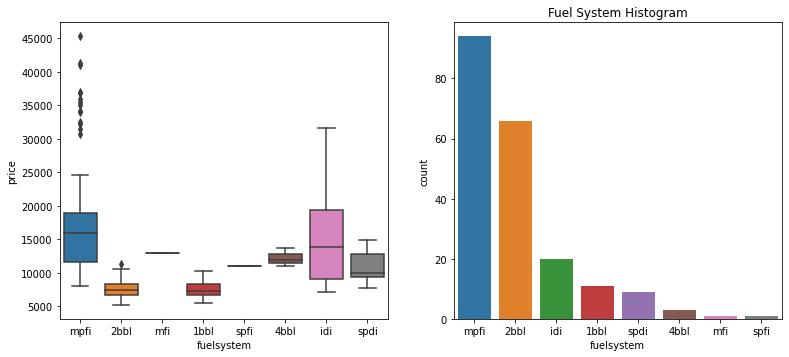

In [37]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='fuelsystem',y='price',data = dataset)

plt.subplot(2,3,2)
plt.title('Fuel System Histogram')
order = dataset['fuelsystem'].value_counts(ascending=False).index
sns.countplot(x='fuelsystem', data=dataset, order=order)

plt.show()

 **mpfi** is the most favored type of **fuelsystem**, even though it has the highest average price.

 Note: Existence of Outliers for **mpfi** and **2bbl**

**Price VS enginetype**

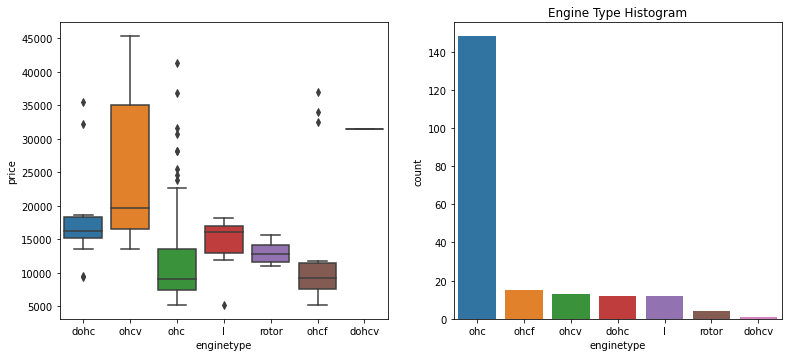

In [38]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='enginetype',y='price',data = dataset)

plt.subplot(2,3,2)
plt.title('Engine Type Histogram')
order = dataset['enginetype'].value_counts(ascending=False).index
sns.countplot(x='enginetype', data=dataset, order=order)

plt.show()

ohc is the most favored engine type.

**Price VS cylindernumber**

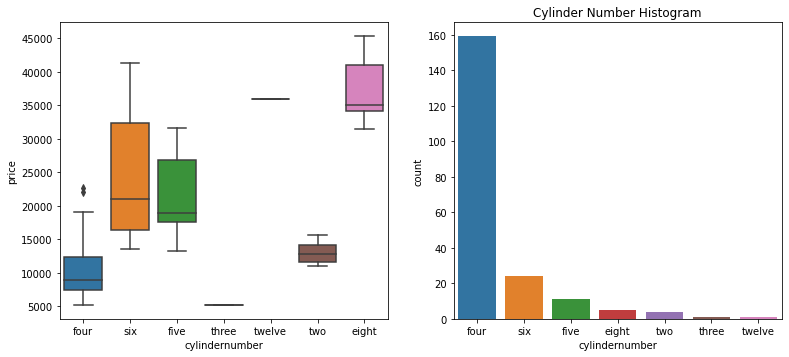

In [39]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='cylindernumber',y='price',data = dataset)

plt.subplot(2,3,2)
plt.title('Cylinder Number Histogram')
order = dataset['cylindernumber'].value_counts(ascending=False).index
sns.countplot(x='cylindernumber', data=dataset, order=order)

plt.show()

The four-cylinder seems to be the most favored.
We can see that expensive cars have eight-cylinder, and four-cylinder are the cheapest.

**Price VS drivewheel**

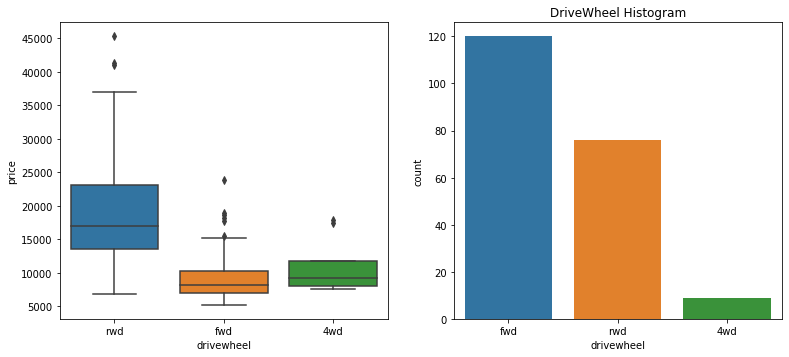

In [40]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = dataset)

plt.subplot(2,3,2)
plt.title('DriveWheel Histogram')
order = dataset['drivewheel'].value_counts(ascending=False).index
sns.countplot(x='drivewheel', data=dataset, order=order)

plt.show()

FWD is the most favored, followed by RWD , and 4WD is the least favored even though it is cheaper than RWD.

Price VS symboling

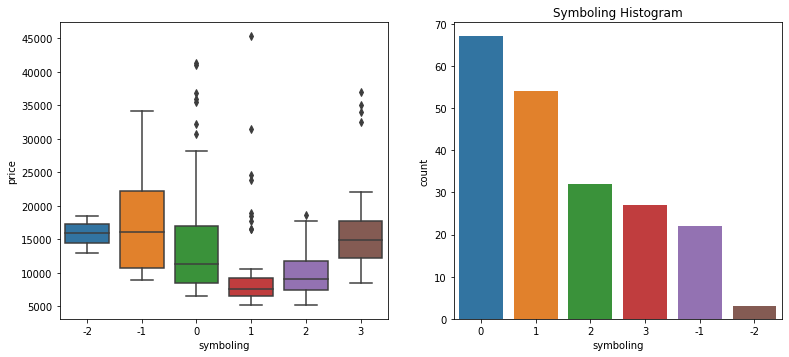

In [41]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x=dataset.symboling, y=dataset.price)


plt.subplot(2,3,2)
plt.title('Symboling Histogram')
order = dataset['symboling'].value_counts(ascending=False).index
sns.countplot(x='symboling', data=dataset, order=order)

plt.show()

It seems that symboling 0 and 1 are the most favored.
Cars with symboling -1 and -2 are the most expensive, which is logical because it means that the car is more secure.

# Data preparation

In [42]:
##Remove the uncorrelated variables with Price, and choose only one variable among the variables correlated with it
dataset = dataset.drop(['carheight' ,'stroke' ,'compressionratio' ,'peakrpm' ,'carlength' ,'carwidth' ,'curbweight' ,'enginesize' ,'highwaympg'], axis=1)
dataset.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,fuelsystem,boreratio,horsepower,citympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,ohcv,six,mpfi,2.68,154,19,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,ohc,four,mpfi,3.19,102,24,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,ohc,five,mpfi,3.19,115,18,17450.0


In [43]:
dataset.shape

(205, 16)

**Dummy Variables creation**

In [44]:
def binary_dummy_replace(x) :
     return x.map({"gas":1,"diesel":0,
                   "std":1,"turbo":0,
                   "two":1, "four":0,
                   "front": 1, "rear": 0})
def dummies(x,df):  
    temp = pd.get_dummies(df[x], prefix=x, drop_first = True)

    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [45]:
dataset = dummies('symboling',dataset)
dataset = dummies('CompanyName',dataset)
dataset = dummies('fueltype',dataset)
dataset = dummies('aspiration',dataset)
dataset = dummies('doornumber',dataset)
dataset = dummies('carbody',dataset)
dataset = dummies('drivewheel',dataset)
dataset = dummies('enginelocation',dataset)
dataset = dummies('enginetype',dataset)
dataset = dummies('cylindernumber',dataset)
dataset = dummies('fuelsystem',dataset)

In [46]:
dataset.head()

,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,3.47,111,21,13495.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,3.47,111,21,16500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,2.68,154,19,16500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,3.19,102,24,13950.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,3.19,115,18,17450.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


- And here is our Dataset, all is numeric

In [47]:
dataset.shape

(205, 60)

## Splitting data into train-test

In [48]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
cars_train, cars_test= train_test_split(dataset, test_size=0.33, random_state = 0)

**Feature Scaling: Train Set & Test Set**

In [49]:
from sklearn.preprocessing import StandardScaler,scale
#we create an object of the class StandardScaler
sc = StandardScaler() 

col_to_scale = ['wheelbase','boreratio','horsepower','citympg','price',]

cars_train[col_to_scale] = sc.fit_transform(cars_train[col_to_scale])
cars_test[col_to_scale] = sc.fit_transform(cars_test[col_to_scale])

cars_train.head()

,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
155,-0.534054,-1.097737,-1.103524,0.333598,-0.583062,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
97,-0.723234,-0.725116,-0.921031,1.008180,-0.680192,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
54,-0.943944,-0.985950,-0.947101,1.008180,-0.755502,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
184,-0.281814,-1.246785,-1.364229,2.020054,-0.680691,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
51,-0.943944,-1.172261,-0.947101,1.008180,-0.917592,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


Division into X_train and y_train sets for model construction

In [50]:
y_train = cars_train.loc[:,cars_train.columns == 'price']

X_train = cars_train.loc[:, cars_train.columns != 'price']

Division into X_test and y_test sets

In [51]:
y_test = cars_test.loc[:,cars_test.columns == 'price']

X_test = cars_test.loc[:, cars_test.columns != 'price']

In [52]:
#Linear Regression Model
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test) 


r2_score(y_test,y_pred)

0.8558800905758736

In [54]:
## Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor()
RForest.fit(X_train,y_train)
y_predict=RForest.predict(X_test)

r2_score(y_test,y_predict)

<ipython-input-54-ecd0f9b5e666>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RForest.fit(X_train,y_train)


0.8343419198087942